In [1]:
from koha.koha_network import KohaNetwork
from koha.config import KohaConfig
import torch
from torchviz import make_dot

vocab_size = 50256
config = KohaConfig()
koha_network = KohaNetwork(vocab_size, config)


batch = 16
x = torch.randint(0, vocab_size, (batch, 1))
y = torch.randint(0, vocab_size, (batch, 1))

koha_network.koha_layer.initialize_state(batch)

num decayed parameter tensors: 8, with 34,736,640 parameters
num non-decayed parameter tensors: 0, with 0 parameters
using fused AdamW: False


In [2]:
v = koha_network(x, y)

In [3]:
v

(tensor([[ 0.0066,  0.0516, -0.1889,  ..., -0.0010,  0.2608,  0.1531],
         [-0.7274,  0.5058,  0.2811,  ..., -0.1119,  0.5029,  0.0398],
         [-0.4563,  0.2063, -0.3448,  ..., -0.0049,  0.4672, -0.3574],
         ...,
         [-0.0744, -0.0063,  0.1263,  ..., -0.4456, -0.2247, -0.0555],
         [ 0.2435,  0.3249, -0.0427,  ..., -0.1287,  0.3088, -0.8779],
         [-0.9885, -0.6757, -0.9220,  ..., -0.1267,  0.1587,  0.2965]],
        grad_fn=<MmBackward0>),
 tensor(11.0310, grad_fn=<NllLossBackward0>),
 tensor(1.7178, grad_fn=<AddBackward0>))

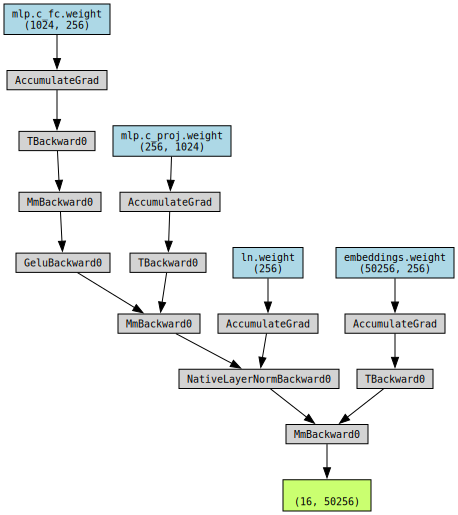

In [6]:
make_dot(v[0], params=dict(koha_network.named_parameters()))